In [1]:
import numpy as np
import warnings
from scipy.io import loadmat
from LFSpy import LocalFeatureSelection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
from pandas.plotting import table
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

np.random.seed(905)


In [2]:
df = pd.read_csv('data/iris.csv', sep=',')


In [8]:
df.head(100)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [3]:
clean_df = df.query('species =="setosa" or species=="versicolor"')

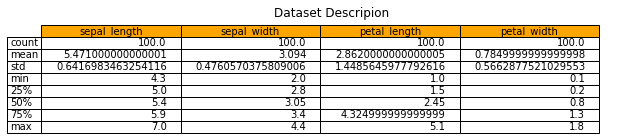

In [23]:
desc = clean_df.describe()
plt.figure(figsize=(10,2))
plot = plt.subplot(111, frame_on=False)
plot.xaxis.set_visible(False) 
plot.yaxis.set_visible(False) 
table(plot, desc,loc='best', colColours=["orange", "orange", "orange", "orange"])
# plt.show()
    #save the plot as a png file
plt.title("Dataset Descripion")
plt.savefig('desc_plot.png')

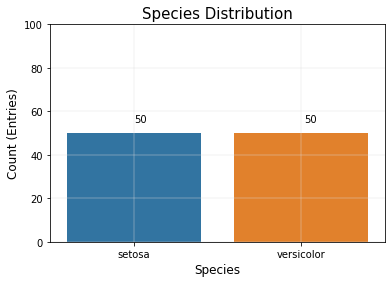

In [155]:
# Visualize the data
sns.countplot(clean_df['species'])
species = clean_df['species'].value_counts()
plt.ylim(0,100)
plt.title('Species Distribution', fontsize=15)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Count (Entries)', fontsize=12)
plt.grid(color='#ddd', linestyle='-', linewidth=2, alpha=0.2)
# plt.text(x=-.175, y=100, s='10,422', fontsize=15)
# plt.text(x=.875, y=100, s='1988', fontsize=15)
xval=0
for index, value in species.items():
    plt.text(x=xval, y=value+5, s=str(value))
    xval += 1.02
plt.savefig("classes.png")

In [71]:
X = clean_df.drop(['species'], axis=1).to_numpy()
y = clean_df['species'].to_numpy()
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [87]:
x_train,x_test,  y_train, y_test = load_dataset()


Training and testing an LFS model with default parameters.
This may take a few minutes...


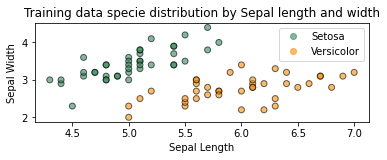

In [168]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['seagreen', 'darkorange'])
# plt.figure(figsize=(6,5))

ax = plt.subplot(2, 1, 1)
    # Plot the training points
s=ax.scatter(x_train[:, 0], x_train[:,1], c=y_train, cmap=cm_bright,
               edgecolors='k', alpha=0.6, )
    # Plot the testing points
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(handles=s.legend_elements()[0], labels=["Setosa", "Versicolor"])
plt.title("Training data specie distribution by Sepal length and width")
# plt.show()
plt.savefig("training.png")

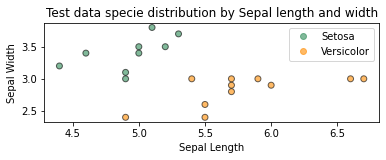

In [167]:
# plt.figure(figsize=(6,5))
ax = plt.subplot(2, 1, 2)
ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(handles=s.legend_elements()[0], labels=["Setosa", "Versicolor"])
plt.title("Test data specie distribution by Sepal length and width")
plt.savefig("test.png")

In [125]:
score_lfs, y_pred_lfs = results_lfspy(x_train, y_train, x_test, y_test)
score_des, y_pred_des = results_decision(x_train, y_train, x_test, y_test)
score_nei, y_pred_nei = results_neighbor(x_train, y_train, x_test, y_test)
score_bye, y_pred_bye = results_naive(x_train, y_train, x_test, y_test)

Training and testing an LFS model with default parameters.
This may take a few minutes...
Training and testing a Decision Forest with default parameters.
Training and testing a K-Neighbors with default parameters
Training and testing a Gaussian Naive Bayes with default parameters 


In [185]:
score_list = [score_lfs, score_des, score_nei, score_bye]
np.save("classification.npy", score_list)
# with open('classification.npy', 'wb') as f:
#     np.save(f, scores)
#     np.save(f, scores_iris), 

In [187]:
score_list = np.load("classification.npy")

In [188]:
score_list

array([1., 1., 1., 1.])

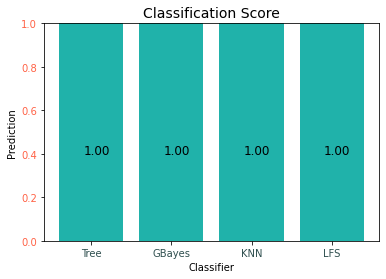

In [189]:
plotScores(score_list, 'Classification Score', 'classification_score.png')

In [154]:
# %% Compare across number of noise variables on Iris dataset
Score_LFS = []
Score_GB = []
Score_KNN = []
Score_TREE = []
mlist = np.arange(0, 250, 25)
for m in mlist:
    s1, _ = results_lfspy(x_train, y_train, x_test, y_test)
    s2, _ = results_decision(x_train, y_train, x_test, y_test)
    s3, _ = results_neighbor(x_train, y_train, x_test, y_test)
    s4, _ = results_naive(x_train, y_train, x_test, y_test)
    
    Score_LFS.append(s1)
    Score_TREE.append(s2)
    Score_KNN.append(s3)
    Score_GB.append(s4)


Training and testing an LFS model with default parameters.
This may take a few minutes...
Training and testing a Decision Forest with default parameters.
Training and testing a K-Neighbors with default parameters
Training and testing a Gaussian Naive Bayes with default parameters 
Training and testing an LFS model with default parameters.
This may take a few minutes...
Training and testing a Decision Forest with default parameters.
Training and testing a K-Neighbors with default parameters
Training and testing a Gaussian Naive Bayes with default parameters 
Training and testing an LFS model with default parameters.
This may take a few minutes...
Training and testing a Decision Forest with default parameters.
Training and testing a K-Neighbors with default parameters
Training and testing a Gaussian Naive Bayes with default parameters 
Training and testing an LFS model with default parameters.
This may take a few minutes...
Training and testing a Decision Forest with default parameters.


In [175]:
np.save('result-2-Score_TREE.npy', Score_TREE)
np.save('result-2-Score_LFS.npy', Score_LFS)
np.save('result-2-Score_KNN.npy', Score_KNN)
np.save('result-2-Score_GB.npy', Score_KNN)

In [ ]:
np.save('result-2-Score_TREE.npy', Score_TREE)
np.save('result-2-Score_LFS.npy', Score_LFS)
np.save('result-2-Score_KNN.npy', Score_KNN)
np.save('result-2-Score_GB.npy', Score_KNN)

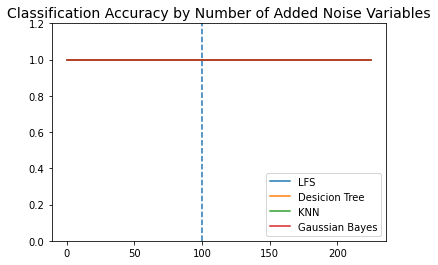

In [190]:

plt.figure()
plt.plot(mlist, Score_LFS)
plt.plot(mlist, Score_TREE)
plt.plot(mlist, Score_KNN)
plt.plot(mlist, Score_GB)
plt.vlines(100, 0, 1.2, linestyles='dashed')
plt.ylim([0,1.2]) 

#plt.xlabel('Number of Noise Features')
plt.title('Classification Accuracy by Number of Added Noise Variables', fontsize=14)
plt.legend(['LFS','Desicion Tree','KNN', 'Gaussian Bayes'], loc='lower right')
plt.savefig('classification_noise.png', bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show()

In [142]:
def plotScores(scores, title=None, filename="plot.png"):
    '''
    Plot classification scores.
    '''
    plt.figure()
    plt.bar(['Tree','GBayes','KNN', 'LFS'], scores, color='lightseagreen')
    plt.ylim([0,1])  
    plt.xlabel("Classifier")
    plt.ylabel("Prediction")
    plt.xticks(color='darkslategray')
    plt.yticks(color='tomato')

    for i, v in enumerate(scores):
        plt.text(i - 0.1, 0.4, '{:.{}f}'.format(v,2), size=12)
    
    plt.title(title, fontsize=14)
    plt.savefig(filename, bbox_inches='tight', pad_inches=0.1, dpi=300)
    return None

In [86]:
def results_lfspy(x_train, y_train, x_test, y_test):
    '''
    Trains an tests and LFS model using default parameters on the given dataset.
    '''
    print('Training and testing an LFS model with default parameters.\nThis may take a few minutes...')
    lfs = LocalFeatureSelection(rr_seed=777)
    pipeline = Pipeline([('classifier', lfs)])
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    score = pipeline.score(x_test, y_test)
    return score, y_pred

In [54]:

def results_decision(x_train, y_train, x_test, y_test):
    print('Training and testing a Decision Forest with default parameters.')
    desc = DecisionTreeClassifier(max_depth=5, random_state=777)
    pipeline = Pipeline([('classifier', desc)])
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    score = pipeline.score(x_test, y_test)
    
    return score, y_pred


In [123]:

def results_neighbor(x_train, y_train, x_test, y_test):
    print('Training and testing a K-Neighbors with default parameters')
    k =  KNeighborsClassifier(3)
#     sel = SelectKBest(f_classif, k=int(0.25*x_train.shape[1]))
    pipeline = Pipeline([('classifier', k)])
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    score = pipeline.score(x_test, y_test)
    
    return score, y_pred

In [124]:

def results_naive(x_train, y_train, x_test, y_test):
    print('Training and testing a Gaussian Naive Bayes with default parameters ')
    naive =   GaussianNB()
#     sel = SelectKBest(f_classif, k=int(0.25*x_train.shape[1]))
    pipeline = Pipeline([('classifier', naive)])
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    score = pipeline.score(x_test, y_test)
    
    return score, y_pred

In [65]:
def load_dataset(m=0):
    features = X
    if m > 0:
        features = add_noise_vars(X, m)
    X_train, X_test, y_train, y_test = train_test_split(features, y, random_state=777, test_size=.2)
    return X_train, X_test, y_train, y_test
